In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models,regularizers
import matplotlib.pyplot as plt
import os


In [2]:
import os

# Path to your dataset
dataset_dir = "../data/new_data"  # change if needed

# Get all class folders
classes = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]

# Count images per class
class_counts = {}
for cls in classes:
    cls_path = os.path.join(dataset_dir, cls)
    class_counts[cls] = len([f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))])

print("Image counts per class:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

print("\n✅ Total images in dataset:", sum(class_counts.values()))


Image counts per class:
African Violet (Saintpaulia ionantha): 298
Aloe Vera: 247
Begonia (Begonia spp.): 234
Birds Nest Fern (Asplenium nidus): 290
Boston Fern (Nephrolepis exaltata): 296
Calathea: 299
Cast Iron Plant (Aspidistra elatior): 266
Chinese Money Plant (Pilea peperomioides): 299
Christmas Cactus (Schlumbergera bridgesii): 299
Chrysanthemum: 208
Ctenanthe: 293
Dracaena: 260
Elephant Ear (Alocasia spp.): 299
English Ivy (Hedera helix): 240
Hyacinth (Hyacinthus orientalis): 299
Iron Cross begonia (Begonia masoniana): 263
Jade plant (Crassula ovata): 299
Money Tree (Pachira aquatica): 299
Orchid: 234
Parlor Palm (Chamaedorea elegans): 299
Peace lily: 299
Poinsettia (Euphorbia pulcherrima): 299
Polka Dot Plant (Hypoestes phyllostachya): 299
Ponytail Palm (Beaucarnea recurvata): 195
Pothos (Ivy arum): 242
Prayer Plant (Maranta leuconeura): 299
Rattlesnake Plant (Calathea lancifolia): 299
Rubber Plant (Ficus elastica): 291
Sago Palm (Cycas revoluta): 199
Schefflera: 299
Snake plan

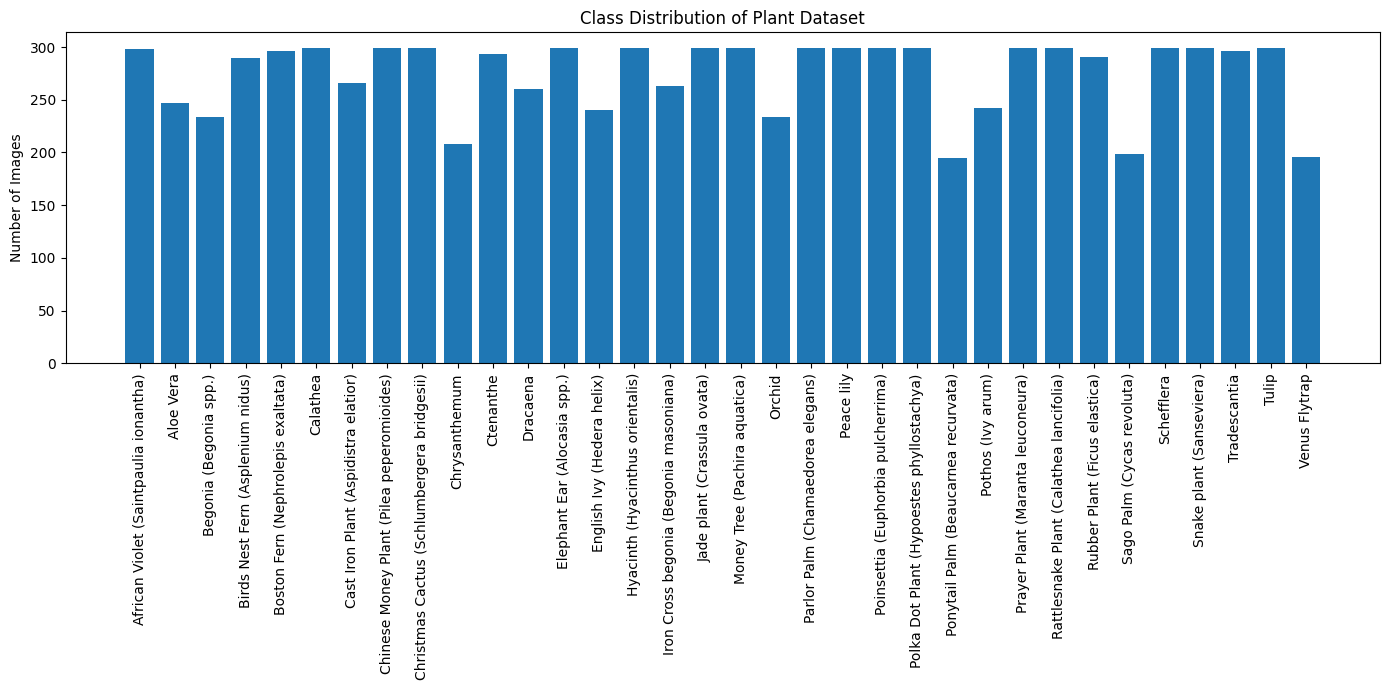

In [3]:
import matplotlib.pyplot as plt

# Your counts (you can paste directly from your output)
class_counts = {
    "African Violet (Saintpaulia ionantha)": 298,
    "Aloe Vera": 247,
    "Begonia (Begonia spp.)": 234,
    "Birds Nest Fern (Asplenium nidus)": 290,
    "Boston Fern (Nephrolepis exaltata)": 296,
    "Calathea": 299,
    "Cast Iron Plant (Aspidistra elatior)": 266,
    "Chinese Money Plant (Pilea peperomioides)": 299,
    "Christmas Cactus (Schlumbergera bridgesii)": 299,
    "Chrysanthemum": 208,
    "Ctenanthe": 293,
    "Dracaena": 260,
    "Elephant Ear (Alocasia spp.)": 299,
    "English Ivy (Hedera helix)": 240,
    "Hyacinth (Hyacinthus orientalis)": 299,
    "Iron Cross begonia (Begonia masoniana)": 263,
    "Jade plant (Crassula ovata)": 299,
    "Money Tree (Pachira aquatica)": 299,
    "Orchid": 234,
    "Parlor Palm (Chamaedorea elegans)": 299,
    "Peace lily": 299,
    "Poinsettia (Euphorbia pulcherrima)": 299,
    "Polka Dot Plant (Hypoestes phyllostachya)": 299,
    "Ponytail Palm (Beaucarnea recurvata)": 195,
    "Pothos (Ivy arum)": 242,
    "Prayer Plant (Maranta leuconeura)": 299,
    "Rattlesnake Plant (Calathea lancifolia)": 299,
    "Rubber Plant (Ficus elastica)": 291,
    "Sago Palm (Cycas revoluta)": 199,
    "Schefflera": 299,
    "Snake plant (Sanseviera)": 299,
    "Tradescantia": 296,
    "Tulip": 299,
    "Venus Flytrap": 196
}


# Plot
plt.figure(figsize=(14,7))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
plt.title("Class Distribution of Plant Dataset")
plt.tight_layout()
plt.show()


In [4]:
gpus = tf.config.list_physical_devices('GPU')
print("GPUs available:", gpus)


GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
dataset_dir = "../data/new_data"  # your dataset
image_size = 224  
batch_size = 16
epochs = 10

In [8]:
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    seed=42,
    image_size=(image_size, image_size),
    batch_size=batch_size
)

class_names = dataset.class_names
print("Classes:", class_names)


Found 9332 files belonging to 34 classes.
Classes: ['African Violet (Saintpaulia ionantha)', 'Aloe Vera', 'Begonia (Begonia spp.)', 'Birds Nest Fern (Asplenium nidus)', 'Boston Fern (Nephrolepis exaltata)', 'Calathea', 'Cast Iron Plant (Aspidistra elatior)', 'Chinese Money Plant (Pilea peperomioides)', 'Christmas Cactus (Schlumbergera bridgesii)', 'Chrysanthemum', 'Ctenanthe', 'Dracaena', 'Elephant Ear (Alocasia spp.)', 'English Ivy (Hedera helix)', 'Hyacinth (Hyacinthus orientalis)', 'Iron Cross begonia (Begonia masoniana)', 'Jade plant (Crassula ovata)', 'Money Tree (Pachira aquatica)', 'Orchid', 'Parlor Palm (Chamaedorea elegans)', 'Peace lily', 'Poinsettia (Euphorbia pulcherrima)', 'Polka Dot Plant (Hypoestes phyllostachya)', 'Ponytail Palm (Beaucarnea recurvata)', 'Pothos (Ivy arum)', 'Prayer Plant (Maranta leuconeura)', 'Rattlesnake Plant (Calathea lancifolia)', 'Rubber Plant (Ficus elastica)', 'Sago Palm (Cycas revoluta)', 'Schefflera', 'Snake plant (Sanseviera)', 'Tradescantia'

In [9]:
def get_dataset_partitions(dataset, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert train_split + val_split + test_split == 1
    
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=42)
    
    dataset_size = tf.data.experimental.cardinality(dataset).numpy()
    
    train_size = int(train_split * dataset_size)
    val_size = int(val_split * dataset_size)
    
    train_ds = dataset.take(train_size)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size + val_size)
    
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions(dataset)

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [11]:
resize_rescale = tf.keras.Sequential([
    layers.Resizing(image_size, image_size),
    layers.Rescaling(1./255)
])
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [16]:
num_classes = len(class_names)

model = models.Sequential([
    layers.Input(shape=(image_size, image_size, 3)),
    resize_rescale,
    data_augmentation,
    
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_2 (Batc  (None, 222, 222, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)     

In [18]:
epochs = 20
history = model.fit(
    train_ds,
    batch_size=32,
    validation_data=val_ds,
    verbose=1,
    epochs=epochs,
)

Epoch 1/20
467/467 [==============================] - 142s 206ms/step - loss: 3.3250 - accuracy: 0.1043 - val_loss: 3.2054 - val_accuracy: 0.1358
Epoch 2/20
467/467 [==============================] - 142s 217ms/step - loss: 2.9081 - accuracy: 0.1897 - val_loss: 2.6698 - val_accuracy: 0.2640
Epoch 3/20
467/467 [==============================] - 139s 210ms/step - loss: 2.6851 - accuracy: 0.2574 - val_loss: 2.8759 - val_accuracy: 0.2336
Epoch 4/20
467/467 [==============================] - 117s 179ms/step - loss: 2.5049 - accuracy: 0.3063 - val_loss: 2.4144 - val_accuracy: 0.3513
Epoch 5/20
467/467 [==============================] - 124s 193ms/step - loss: 2.3079 - accuracy: 0.3655 - val_loss: 2.1000 - val_accuracy: 0.4386
Epoch 6/20
467/467 [==============================] - 124s 179ms/step - loss: 2.2075 - accuracy: 0.3966 - val_loss: 2.7069 - val_accuracy: 0.3136
Epoch 7/20
467/467 [==============================] - 142s 211ms/step - loss: 2.0852 - accuracy: 0.4477 - val_loss: 2.0316 -